In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from urllib.parse import urlencode

In [2]:
RANDOM_STATE = 42

In [3]:
df = pd.read_excel('db_main_Basket.xlsx', index_col=0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10965 entries, Минск — Пари Нижний Новгород to Аманкай Клаб Ла Риоха — Суарди
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_game      9247 non-null   object 
 1   name_champ     9458 non-null   object 
 2   kef_1          10965 non-null  float64
 3   kef_2          10965 non-null  float64
 4   tot            10965 non-null  float64
 5   fora           10965 non-null  float64
 6   diff_tot1-tot  9675 non-null   float64
 7   diff_tot2-tot  9663 non-null   float64
 8   diff_tot3-tot  9324 non-null   float64
 9   ABS_aft_3q     10190 non-null  float64
 10  tot_after_3q   10190 non-null  float64
 11  diff_ta3-tot   10190 non-null  float64
 12  tot_fin        10965 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 1.2+ MB


In [24]:
df = df.drop('data_game', axis=1)

In [11]:
df = df.drop(df[df['name_champ'] == 'NCAA'].index, axis=0) # удаление по значению

In [17]:
df=df[df['tot']>110] # удаление по усдлвиям тотала

In [25]:
df.head()

,name_champ,kef_1,kef_2,tot,fora,diff_tot1-tot,diff_tot2-tot,diff_tot3-tot,ABS_aft_3q,tot_after_3q,diff_ta3-tot,tot_fin
Минск — Пари Нижний Новгород,Лига ВТБ,7.00,1.10,150.5,16.0,8.4,-4.6,-6.6,42.0,145.5,-5.0,149
Руна — Автодор,Лига ВТБ,1.80,2.00,160.5,1.5,4.9,-5.1,5.9,8.0,166.5,6.0,167
Япония (ж) — Филиппины (ж),Жен. Азиатские Игры. Китай,1.80,1.90,151.5,3.0,11.1,-10.9,-8.9,27.0,140.5,-11.0,155
Казахстан (ж) — Гонконг (ж),Жен. Азиатские Игры. Китай,1.25,3.55,130.5,7.0,-1.6,2.4,-5.6,1.0,123.5,-7.0,126
Китай (ж) — Индия (ж),Жен. Азиатские Игры. Китай,1.85,1.85,151.5,3.0,7.1,1.1,7.1,51.0,166.5,15.0,164


In [26]:
X = df.drop('tot_fin', axis=1)
y = df['tot_fin']

In [29]:
for c in X.columns:
    if X[c].dtype != 'object':
          mean = np.mean(X[c])
          X[c].fillna(mean, inplace=True)

In [31]:
for c in X.columns:
    if X[c].dtype == 'object':
          X[c].fillna("", inplace=True)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10965 entries, Минск — Пари Нижний Новгород to Аманкай Клаб Ла Риоха — Суарди
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_champ     10965 non-null  object 
 1   kef_1          10965 non-null  float64
 2   kef_2          10965 non-null  float64
 3   tot            10965 non-null  float64
 4   fora           10965 non-null  float64
 5   diff_tot1-tot  10965 non-null  float64
 6   diff_tot2-tot  10965 non-null  float64
 7   diff_tot3-tot  10965 non-null  float64
 8   ABS_aft_3q     10965 non-null  float64
 9   tot_after_3q   10965 non-null  float64
 10  diff_ta3-tot   10965 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.3+ MB


In [33]:
for c in X.columns:
    if X[c].dtype == 'object':
          print(c, len(X[c].unique()))

name_champ 382


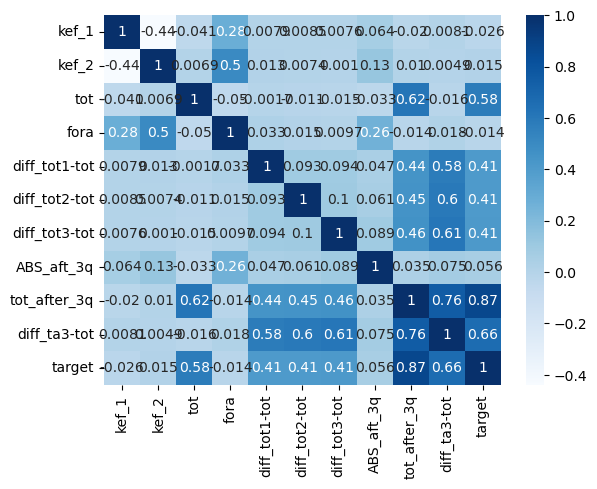

In [34]:
import seaborn as sb

X['target'] = y

cols = X.columns[X.dtypes != 'object']

corr = X[cols].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

X.drop('target', axis=1, inplace=True)

In [35]:
!pip install association-metrics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3951 sha256=03a2190e9ec4450edfcc87bb8fbd29c9896286ca06cfc10bb5a6a315718c195c
  Stored in directory: c:\users\aleksey\appdata\local\pip\cache\wheels\18\bd\17\1d2797e86c263937dab5965950332519bd9dd8bddd746c88bc
Successfully built association-metrics


In [36]:
import association_metrics as am

XC = X.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,name_champ
name_champ,1.0


In [39]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

kef_1


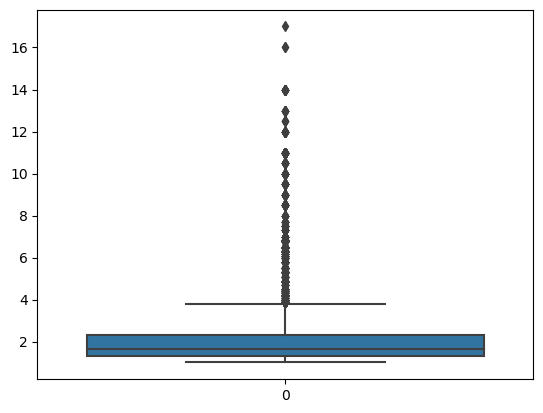

kef_2


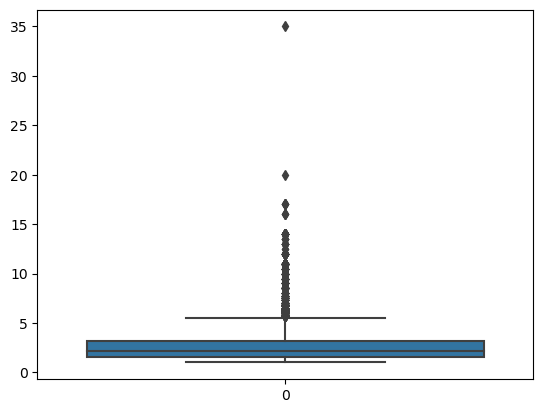

tot


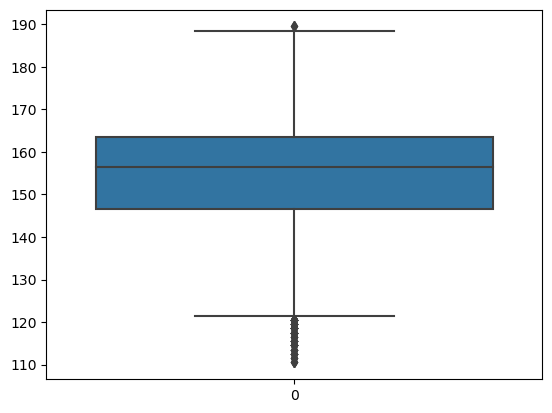

fora


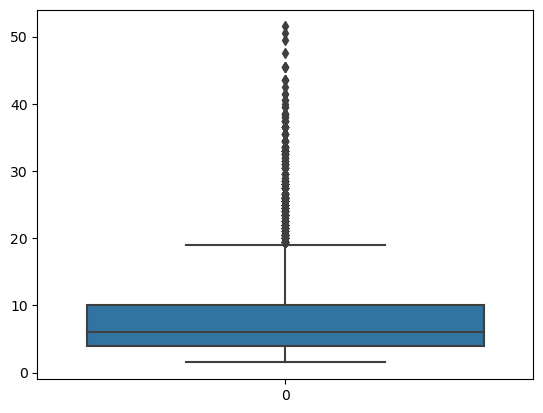

diff_tot1-tot


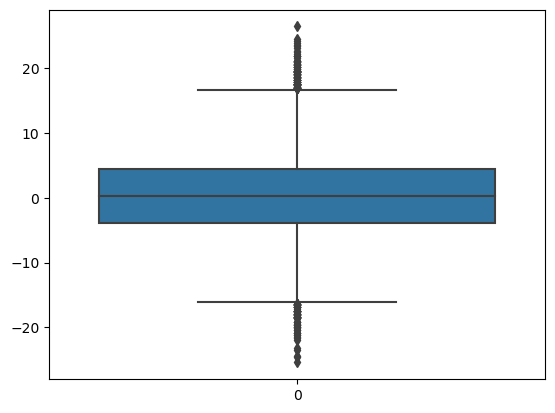

diff_tot2-tot


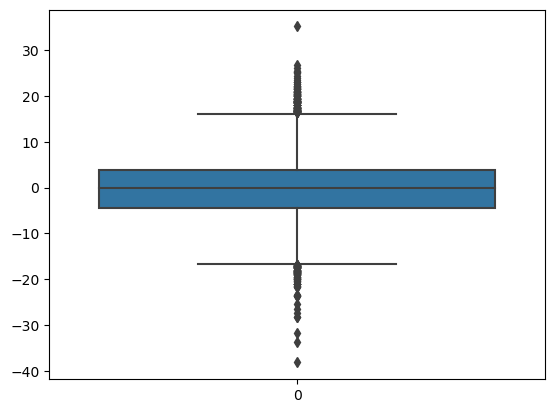

diff_tot3-tot


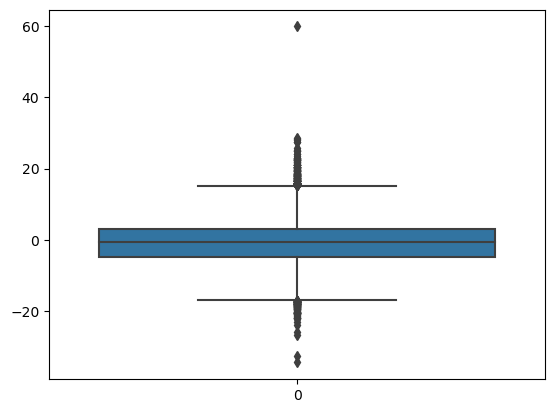

ABS_aft_3q


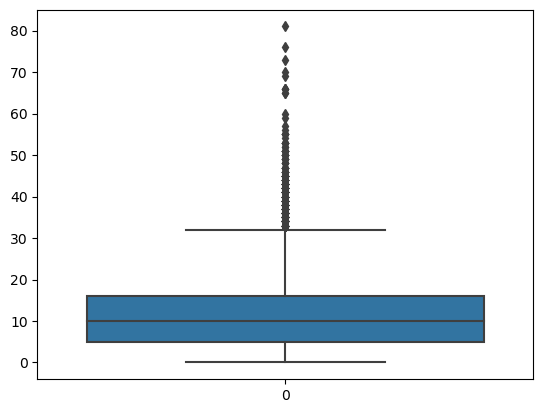

tot_after_3q


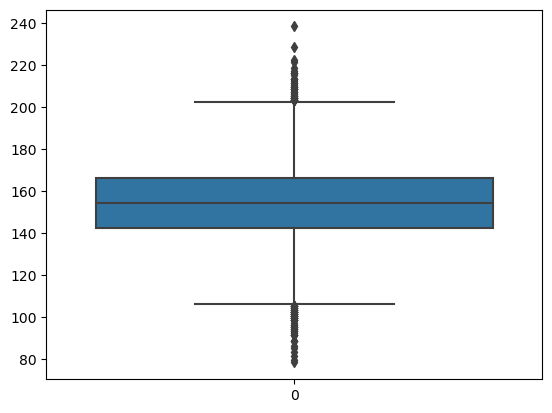

diff_ta3-tot


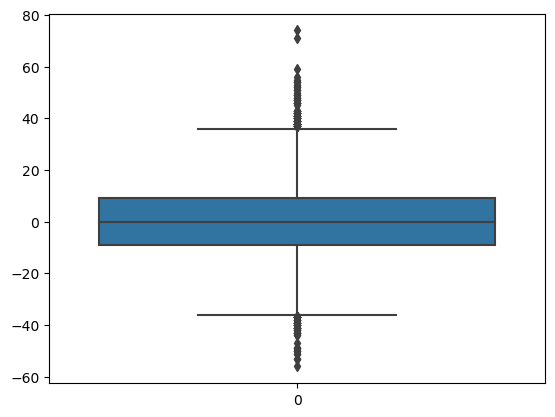

In [40]:
for col in num_cols:
    print(col)
    sb.boxplot(X[col])
    plt.show()

In [41]:
!pip install category_encoders -q

In [42]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


enc = TargetEncoder(cols=cat_cols)
enc.fit(X_train, y_train)
X_train_new = enc.transform(X_train)
X_test_new = enc.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = pd.DataFrame(scaler.transform(X_train_new), columns=X_train.columns)
X_test_new = pd.DataFrame(scaler.transform(X_test_new), columns=X_test.columns)

model = LinearRegression()
model.fit(X_train_new, y_train)
pred = model.predict(X_test_new)

In [47]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

MAPE(y_test, pred)

0.06822825290693693

ошибка в среднем 6,8 процента

In [48]:
from sklearn.pipeline import Pipeline

p1 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

In [49]:
p1.fit(X_train, y_train)

Pipeline(steps=[('encoder_',
                 TargetEncoder(cols=Index(['name_champ'], dtype='object'))),
                ('scaler_', StandardScaler()), ('model_', LinearRegression())])

In [51]:
pred = p1.predict(X_test)

MAPE(y_test, pred)

0.06822825290693693

In [52]:
from sklearn.preprocessing import MinMaxScaler

# по умолчанию smoothing = 10

p2 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p3 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p4 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p5 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=10)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p6 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=100)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

p7 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])

p8 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', LinearRegression())
    ])

In [53]:
for i,p in enumerate([p1,p2,p3,p4,p5,p6,p7,p8]):
    p.fit(X_train, y_train)
    pred = p.predict(X_test)
    print(i+1, MAPE(y_test, pred))

1 0.06822825290693693
2 0.06821747979427358
3 0.06830075528254116
4 0.06821747979427356
5 0.0682282529069369
6 0.06830075528254116
7 0.06820987020385999
8 0.06820987020386


In [54]:
p9 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p9.fit(X_train, y_train)
pred = p9.predict(X_test)
MAPE(y_test, pred)

0.06996923975676668

In [55]:
from sklearn.preprocessing import MinMaxScaler

p10 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p11 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p12 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p13 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols, smoothing=1)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

In [56]:
for i,p in enumerate([p9,p10,p11,p12,p13]):
    p.fit(X_train.iloc[:50000], y_train[:50000])
    pred = p.predict(X_test)
    print(i+9, MAPE(y_test, pred))

9 0.06937216800306409
10 0.07189205995541291
11 0.06972517359741216
12 0.07235590315672222
13 0.0695142206988678


In [57]:
weights = pd.DataFrame(p9['model_'].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
weights

,0
tot_after_3q,0.780558
tot,0.035730
name_champ,0.027498
diff_tot1-tot,0.024312
diff_tot2-tot,0.022951
diff_ta3-tot,0.022098
kef_1,0.018677
fora,0.017986
kef_2,0.017900
diff_tot3-tot,0.016498


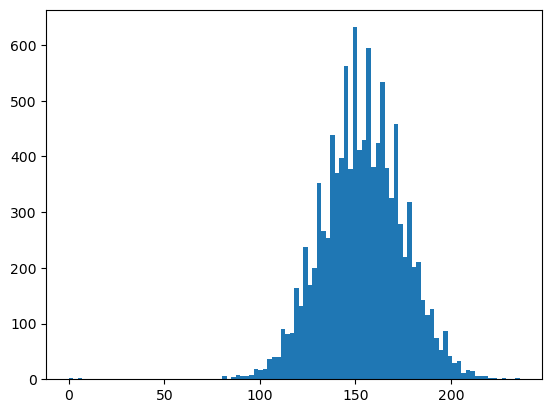

In [58]:
plt.hist(y, bins=100);

In [60]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [61]:
p9 = Pipeline([
    ('encoder_',TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(n_jobs=-1))
    ])

p9.fit(X_train, y_train)
pred = p9.predict(X_test)

MAPE(np.exp(y_test), np.exp(pred))

ValueError: Input X contains infinity or a value too large for dtype('float64').